In [ ]:
# Data from https://www.frontiersin.org/articles/10.3389/femat.2022.893797
!curl -L https://github.com/m-r-quinn/cnn_supercon/raw/main/training_data/all_data.csv > all_data.csv

In [1]:
import pandas as pd
scdata = pd.read_csv('all_data.csv')
scdata

,Unnamed: 0,composition,pretty_composition,parent_guess,materials_project_id,tc,debyet,elecspecheat,unit_elecspecheat,neelt,...,h2,i1,i2,o1,o2,o_empirical,lata,latb,latc,unit_lat
0,0,Au0.9Ga0.1,Ga0.1Au0.9,Au,mp-81,0.264,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Au0.95Ga0.05,Ga0.05Au0.95,Au,mp-81,0.032,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Ba0.2La1.8Cu1O4-Y,Ba0.2La1.8Cu1O4,La2CuO4,mp-19735,29.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,O,4-Y,NaN,NaN,NaN,NaN,NaN
3,3,Ba0.1La1.9Ag0.1Cu0.9O4-Y,Ba0.1La1.9Cu0.9Ag0.1O4,La2CuO4,mp-19735,26.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,O,4-Y,NaN,NaN,NaN,NaN,NaN
4,4,Ba0.1La1.9Cu1O4-Y,Ba0.1La1.9Cu1O4,La2CuO4,mp-19735,19.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,O,4-Y,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14883,33238,Au1Nb3,Nb3Au,Nb3Au,mp-2752,10.560,251.0,9.00,mJ/gat.K2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14884,33239,Au1V3,V3Au,V3Au,mp-570698,2.970,329.0,13.08,mJ/gat.K2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14885,33241,Mo2Zr1,ZrMo2,ZrMo2,mp-2049,4.570,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14886,33242,Hf1V2,HfV2,HfV2,mp-1043,9.150,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


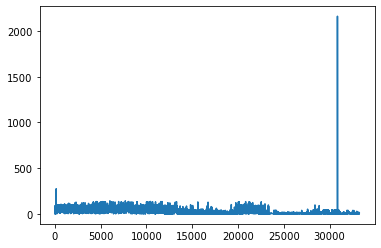

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scdata.iloc[:,0],scdata.loc[:,'tc'])

In [3]:
scdata[scdata.loc[:,'tc'] > 200]

,Unnamed: 0,composition,pretty_composition,parent_guess,materials_project_id,tc,debyet,elecspecheat,unit_elecspecheat,neelt,...,h2,i1,i2,o1,o2,o_empirical,lata,latb,latc,unit_lat
83,140,Er1Ba2Cu3O7-X,Ba2ErCu3O7,Ba2ErCu3O7,mp-622110,275.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,O,7-X,NaN,NaN,NaN,NaN,NaN
13823,30859,La0.23Th0.77Pb3,La0.23Th0.77Pb3,ThPb3,mp-21381,2161.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
scdata_clean = scdata.drop(scdata[scdata.loc[:,'tc'] > 200].index)

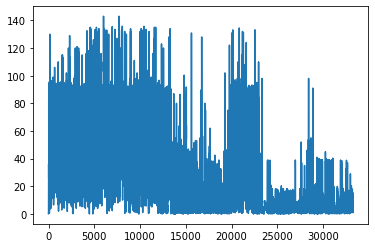

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(scdata_clean.iloc[:,0],scdata_clean.loc[:,'tc'])

In [6]:
!curl -L https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv > Elements.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14979  100 14979    0     0    98k      0 --:--:-- --:--:-- --:--:--   98k


In [7]:
atoms = pd.read_csv('Elements.csv')
atoms

,AtomicNumber,Element,Symbol,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes,Discoverer,Year,SpecificHeat,NumberofShells,NumberofValence
0,1,Hydrogen,H,1.007,0,1,1,1,1.0,gas,...,13.5984,0.000090,14.175,20.28,3.0,Cavendish,1766.0,14.304,1,1.0
1,2,Helium,He,4.002,2,2,2,1,18.0,gas,...,24.5874,0.000179,NaN,4.22,5.0,Janssen,1868.0,5.193,1,NaN
2,3,Lithium,Li,6.941,4,3,3,2,1.0,solid,...,5.3917,0.534000,453.850,1615.00,5.0,Arfvedson,1817.0,3.582,2,1.0
3,4,Beryllium,Be,9.012,5,4,4,2,2.0,solid,...,9.3227,1.850000,1560.150,2742.00,6.0,Vaulquelin,1798.0,1.825,2,2.0
4,5,Boron,B,10.811,6,5,5,2,13.0,solid,...,8.2980,2.340000,2573.150,4200.00,6.0,Gay-Lussac,1808.0,1.026,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,Flerovium,Fl,289.000,175,114,114,7,14.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,NaN,7,4.0
114,115,Moscovium,Mc,288.000,173,115,115,7,15.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,5.0
115,116,Livermorium,Lv,292.000,176,116,116,7,16.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,7,6.0
116,117,Tennessine,Ts,295.000,178,117,117,7,17.0,artificial,...,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,7,7.0


In [8]:
import re
import numpy as np
# split composition into sensible representation.
# assume format is [chemical symbol][number][chemical symbol][number]...
def parse_composition(p):
    asl = list(atoms['Symbol'])
    comp = {}
    try:
        while len(p) > 0:
            if p[0:2] in asl: # two letter element
                elem = p[0:2]
                p = p[2:]
                if not (elem in comp.keys()):
                    comp[elem] = 0
                n = re.search('^[\d.]+',p)
                if not (n is None):
                    n = n.group(0)
                    comp[elem] += float(n)
                    p = p[len(n):]
                else:
                    comp[elem] += 1 # lack of subscript implies 1
            elif p[0:1] in asl: # one letter element
                elem = p[0:1]
                if not (elem in comp.keys()):
                    comp[elem] = 0
                p = p[1:]
                n = re.search('^[\d.]+',p)
                if not (n is None):
                    n = n.group(0)
                    comp[elem] += float(n)
                    p = p[len(n):]
                else:
                    comp[elem] += 1 # lack of subscript implies 1
            else:
                # See if we have a grouping to subparse
                subp = re.search('^\(.+\)',p)
                if not (subp is None):
                    subp = subp.group(0)
                    p = p[len(subp):]
                    subc = parse_composition(subp[1:-1])
                    if not (subc is None):
                        n = re.search('^[\d.]+',p)
                        if not (n is None):
                            n = n.group(0)
                            p = p[len(n):]
                            n = float(n)
                        else:
                            n = 1 # lack of subscript implies 1
                        for e in subc:
                            if not (e in comp.keys()):
                                comp[e] = 0
                            comp[e] += n*subc[e]
                else:                        
                    p = p[1:]
        return comp
    except Exception as e:
        print(e)
        return None

def parse_vectorize_composition(p):
    pc = parse_composition(p)
    if pc is None:
        pc = {}
    return np.array([pc[a] if a in pc else 0.0 for a in list(atoms['Symbol'])])

In [9]:
one = parse_composition(scdata_clean['pretty_composition'][1923])
one

{'Sr': 2.0, 'Y': 1.0, 'Cu': 2.75, 'Re': 0.25, 'O': 7.0}

In [10]:
parse_vectorize_composition(scdata_clean['pretty_composition'][1923])

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 7.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 2.75, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 2.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [11]:
# collect our inputs and outputs
inputs = []
outputs = []
for x in scdata_clean.itertuples():
    inputs.append(parse_vectorize_composition(x.pretty_composition))
    outputs.append(x.tc)
data_ready = pd.DataFrame(data = np.array((inputs,outputs),dtype=np.object).T, columns=['encoded_composition','tc'])
data_ready

object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()
object of type 'float' has no len()


,encoded_composition,tc
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.264
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.032
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, ...",29
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, ...",26
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, ...",19
...,...,...
14881,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10.56
14882,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2.97
14883,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4.57
14884,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9.15


In [16]:
print(data_ready['encoded_composition'][200],len(data_ready['encoded_composition'][200]))

[0.   0.   0.   0.   0.   0.   0.   6.82 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.
 2.9  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.  ] 118


In [13]:
import tensorflow as tf
print("Tensorflow Version:", tf.__version__)

Tensorflow Version: 2.3.0


In [14]:
train_dataset = data_ready.sample(frac=0.8, random_state=0)
test_dataset = data_ready.drop(train_dataset.index)


In [33]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('tc')
test_labels = test_features.pop('tc')

train_features = np.array(list(train_features['encoded_composition']))
test_features = np.array(list(test_features['encoded_composition']))

train_labels = np.array(list(train_labels))
test_labels = np.array(list(test_labels))

In [34]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
      layers.Dense(118, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [35]:
model.fit(
    train_features, train_labels,
    validation_split=0.2,epochs=10)

Epoch 1/10
298/298 [==============================] - 12s 40ms/step - loss: 15.2239 - val_loss: 10.4316
Epoch 2/10
298/298 [==============================] - 12s 40ms/step - loss: 10.1799 - val_loss: 9.2693
Epoch 3/10
298/298 [==============================] - 11s 39ms/step - loss: 9.1644 - val_loss: 8.6578
Epoch 4/10
298/298 [==============================] - 10s 35ms/step - loss: 8.6470 - val_loss: 8.4128
Epoch 5/10
298/298 [==============================] - 11s 37ms/step - loss: 8.1825 - val_loss: 8.0889
Epoch 6/10
298/298 [==============================] - 12s 42ms/step - loss: 7.8514 - val_loss: 7.8923
Epoch 7/10
298/298 [==============================] - 12s 40ms/step - loss: 7.5808 - val_loss: 7.6662
Epoch 8/10
298/298 [==============================] - 10s 32ms/step - loss: 7.4061 - val_loss: 7.3541
Epoch 9/10
298/298 [==============================] - 11s 38ms/step - loss: 7.1920 - val_loss: 7.3532
Epoch 10/10
298/298 [==============================] - 10s 35ms/step - loss: 7.

Text(0, 0.5, 'Predictions [Tc]')

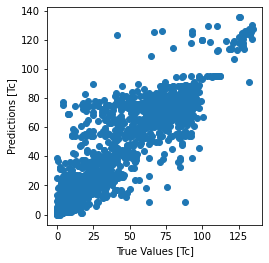

In [36]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Tc]')
plt.ylabel('Predictions [Tc]')
